In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
base_path = '/content/drive/MyDrive/Colab Notebooks/Animals/Animals'

cheetah_img = []
jaguar_img = []
leopard_img = []
lion_img = []
tiger_img = []


In [76]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (300, 300))
                images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return images

for animal_folder in os.listdir(base_path):
    animal_path = os.path.join(base_path, animal_folder)
    if os.path.isdir(animal_path):
        if animal_folder == "Cheetah":
            cheetah_img = load_images(animal_path)
        elif animal_folder == "Jaguar":
            jaguar_img = load_images(animal_path)
        elif animal_folder == "Leopard":
            leopard_img = load_images(animal_path)
        elif animal_folder == "Lion":
            lion_img = load_images(animal_path)
        elif animal_folder == "Tiger":
            tiger_img = load_images(animal_path)


In [77]:
if cheetah_img:
    cheetah_img = np.array(cheetah_img)
if jaguar_img:
    jaguar_img = np.array(jaguar_img)
if leopard_img:
    leopard_img = np.array(leopard_img)
if lion_img:
    lion_img = np.array(lion_img)
if tiger_img:
    tiger_img = np.array(tiger_img)


In [78]:
def convert_grayscale(images):
    gray_images = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray_img)
    return np.array(gray_images)

cheetah_gray = convert_grayscale(cheetah_img) if len(cheetah_img) > 0 else []
jaguar_gray = convert_grayscale(jaguar_img) if len(jaguar_img) > 0 else []
leopard_gray = convert_grayscale(leopard_img) if len(leopard_img) > 0 else []
lion_gray = convert_grayscale(lion_img) if len(lion_img) > 0 else []
tiger_gray = convert_grayscale(tiger_img) if len(tiger_img) > 0 else []


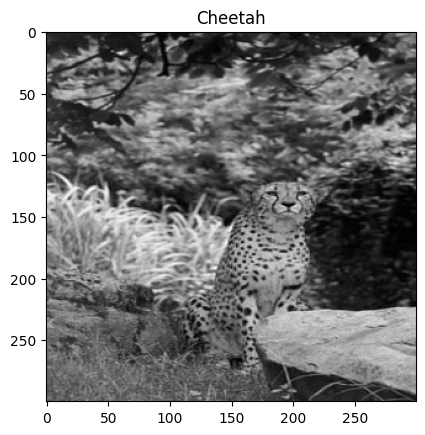

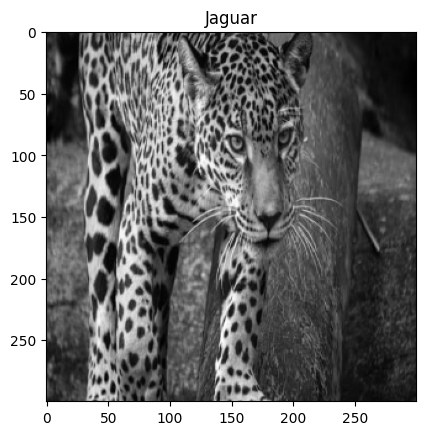

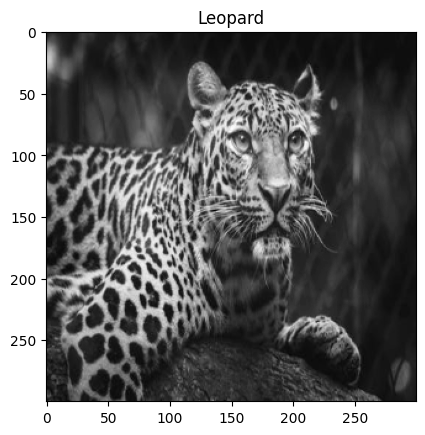

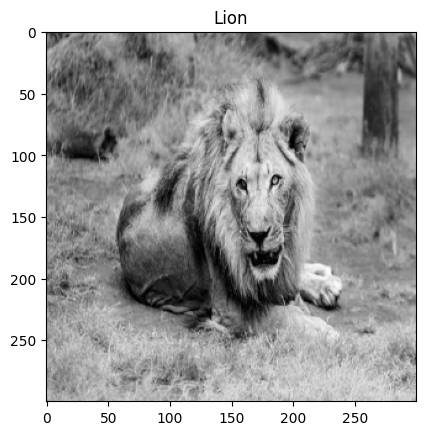

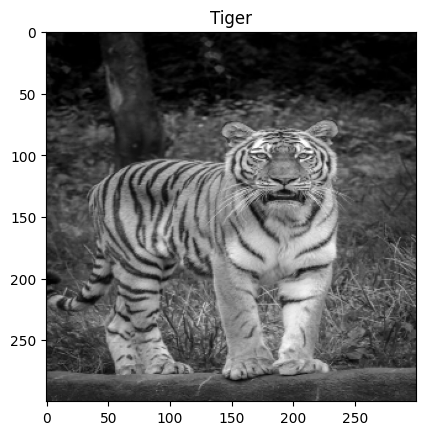

In [79]:
if len(cheetah_gray) > 0:
    plt.imshow(cheetah_gray[0], cmap='gray')
    plt.title('Cheetah')
    plt.show()

if len(jaguar_gray) > 0:
    plt.imshow(jaguar_gray[0], cmap='gray')
    plt.title('Jaguar')
    plt.show()

if len(leopard_gray) > 0:
    plt.imshow(leopard_gray[0], cmap='gray')
    plt.title('Leopard')
    plt.show()

if len(lion_gray) > 0:
    plt.imshow(lion_gray[0], cmap='gray')
    plt.title('Lion')
    plt.show()

if len(tiger_gray) > 0:
    plt.imshow(tiger_gray[0], cmap='gray')
    plt.title('Tiger')
    plt.show()


In [80]:
import random

def create_folds(data, num_folds=5):
    random.shuffle(data)
    fold_size = len(data) // num_folds
    folds = []
    for i in range(num_folds):
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i < num_folds - 1 else len(data)
        folds.append(data[start_index:end_index])
    return folds
all_img = []
if cheetah_gray is not None:
    all_img.extend(cheetah_gray)
if jaguar_gray is not None:
    all_img.extend(jaguar_gray)
if leopard_gray is not None:
    all_img.extend(leopard_gray)
if lion_gray is not None:
    all_img.extend(lion_gray)
if tiger_gray is not None:
    all_img.extend(tiger_gray)

folds = create_folds(all_img, num_folds=5)

for i in range(5):
  print(f"Fold {i+1}:")
  validation_set = folds[i]
  training_set = [image for j, fold in enumerate(folds) if j != i for image in fold]
  print(f"  Training img: {len(training_set)}")
  print(f"  Validation img: {len(validation_set)}")

Fold 1:
  Training img: 136
  Validation img: 34
Fold 2:
  Training img: 136
  Validation img: 34
Fold 3:
  Training img: 136
  Validation img: 34
Fold 4:
  Training img: 136
  Validation img: 34
Fold 5:
  Training img: 136
  Validation img: 34


In [81]:
def calculate_distances(test_image, training_set):
    distances = [np.sqrt(np.sum(np.square(test_image - train_image))) for train_image in training_set]
    return distances

def knn(training_set, validation_set, k=5):
    pred_lbls = []
    for test_image in validation_set:
        distances = calculate_distances(test_image, [x[0] for x in training_set])
        nearest_neighbor_indices = np.argsort(distances)[:k]
        neigh_lbl = [training_set[i][1] for i in nearest_neighbor_indices]
        pred_lbl = max(set(neigh_lbl), key=neigh_lbl.count)
        pred_lbls.append(pred_lbl)
    return pred_lbls


In [82]:
labels = [0] * len(cheetah_gray) + [1] * len(jaguar_gray) + [2] * len(leopard_gray) + [3] * len(lion_gray) + [4] * len(tiger_gray)
all_img_lbls = list(zip(all_img, labels))

all_img_lbls = list(zip(all_img, labels))

k_values = list(range(1, 31))
fold_accuracies = {k: [] for k in k_values}

folds_with_labels = create_folds(all_img_lbls, num_folds=5)

for i in range(5):
    print(f"Fold {i+1}:")
    validation_set_with_labels = folds_with_labels[i]
    training_set_with_labels = [
        image_label for j, fold in enumerate(folds_with_labels) if j != i for image_label in fold
    ]

    for k in k_values:
        pred_lbls = knn(training_set_with_labels, [x[0] for x in validation_set_with_labels], k=k)
        true_labels = [x[1] for x in validation_set_with_labels]

        correct_pred = sum(1 for predicted, true in zip(pred_lbls, true_labels) if predicted == true)
        accuracy = correct_pred / len(true_labels) if len(true_labels) > 0 else 0
        fold_accuracies[k].append(accuracy)
        print(f"  Accuracy for k={k}: {accuracy:.4f}")


Fold 1:
  Accuracy for k=1: 0.3235
  Accuracy for k=2: 0.2353
  Accuracy for k=3: 0.2647
  Accuracy for k=4: 0.2353
  Accuracy for k=5: 0.2059
  Accuracy for k=6: 0.2059
  Accuracy for k=7: 0.2353
  Accuracy for k=8: 0.2059
  Accuracy for k=9: 0.2059
  Accuracy for k=10: 0.1471
  Accuracy for k=11: 0.2353
  Accuracy for k=12: 0.2647
  Accuracy for k=13: 0.2941
  Accuracy for k=14: 0.2647
  Accuracy for k=15: 0.2647
  Accuracy for k=16: 0.2647
  Accuracy for k=17: 0.3235
  Accuracy for k=18: 0.3235
  Accuracy for k=19: 0.3235
  Accuracy for k=20: 0.2941
  Accuracy for k=21: 0.3529
  Accuracy for k=22: 0.2941
  Accuracy for k=23: 0.3235
  Accuracy for k=24: 0.3235
  Accuracy for k=25: 0.3235
  Accuracy for k=26: 0.2941
  Accuracy for k=27: 0.2941
  Accuracy for k=28: 0.3529
  Accuracy for k=29: 0.3529
  Accuracy for k=30: 0.3824
Fold 2:
  Accuracy for k=1: 0.2059
  Accuracy for k=2: 0.2353
  Accuracy for k=3: 0.3529
  Accuracy for k=4: 0.2941
  Accuracy for k=5: 0.2353
  Accuracy for k=6

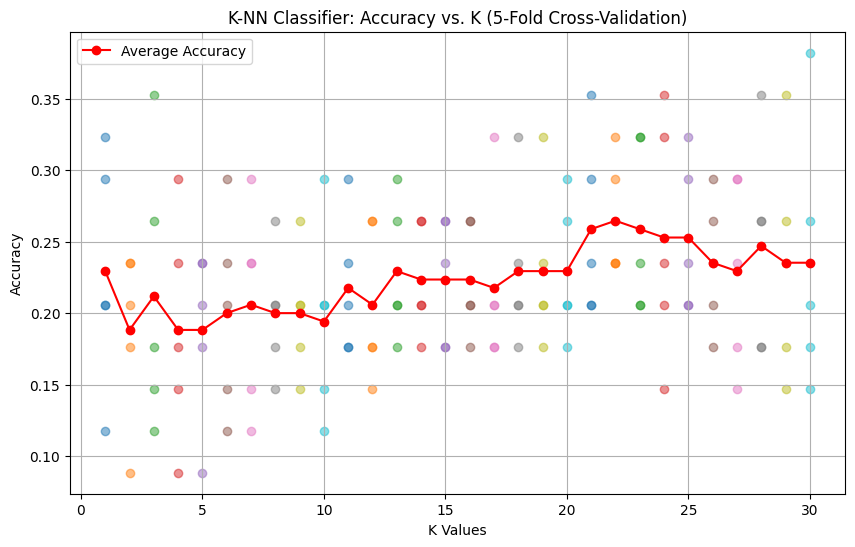

In [83]:
average_accuracies = {k: sum(accs) / len(accs) for k, accs in fold_accuracies.items()}
plt.figure(figsize=(10, 6))
for k, accs in fold_accuracies.items():
  plt.scatter([k] * len(accs), accs, marker='o', alpha=0.5)  # Use scatter for better visualization
plt.plot(list(average_accuracies.keys()), list(average_accuracies.values()), marker='o', label='Average Accuracy', color='red')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('K-NN Classifier: Accuracy vs. K (5-Fold Cross-Validation)')
plt.grid(True)
plt.legend()
plt.show()